In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
data = pd.read_csv(r"Mall_Customers.csv")

# Data Visualisation

# 1.Univariate Analysis

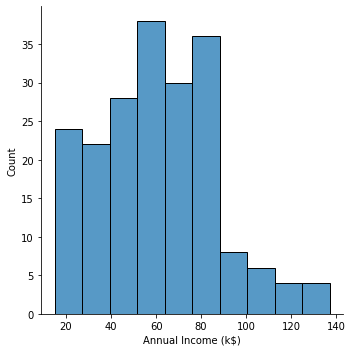

In [4]:
sns.displot(data['Annual Income (k$)'])

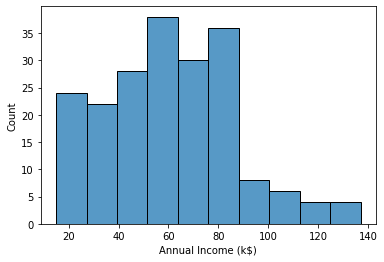

In [5]:
sns.histplot(data['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


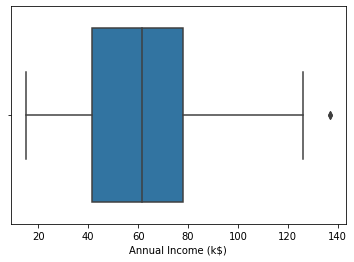

In [9]:
sns.boxplot(data['Annual Income (k$)'])

# Bivariate Analaysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


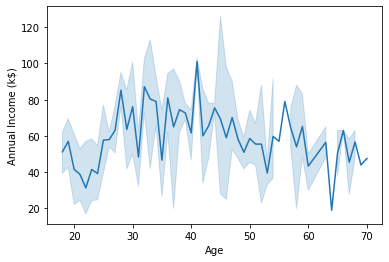

In [14]:
sns.lineplot(data['Age'], data['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


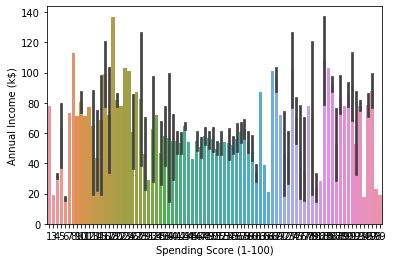

In [15]:
sns.barplot(data['Spending Score (1-100)'], data['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


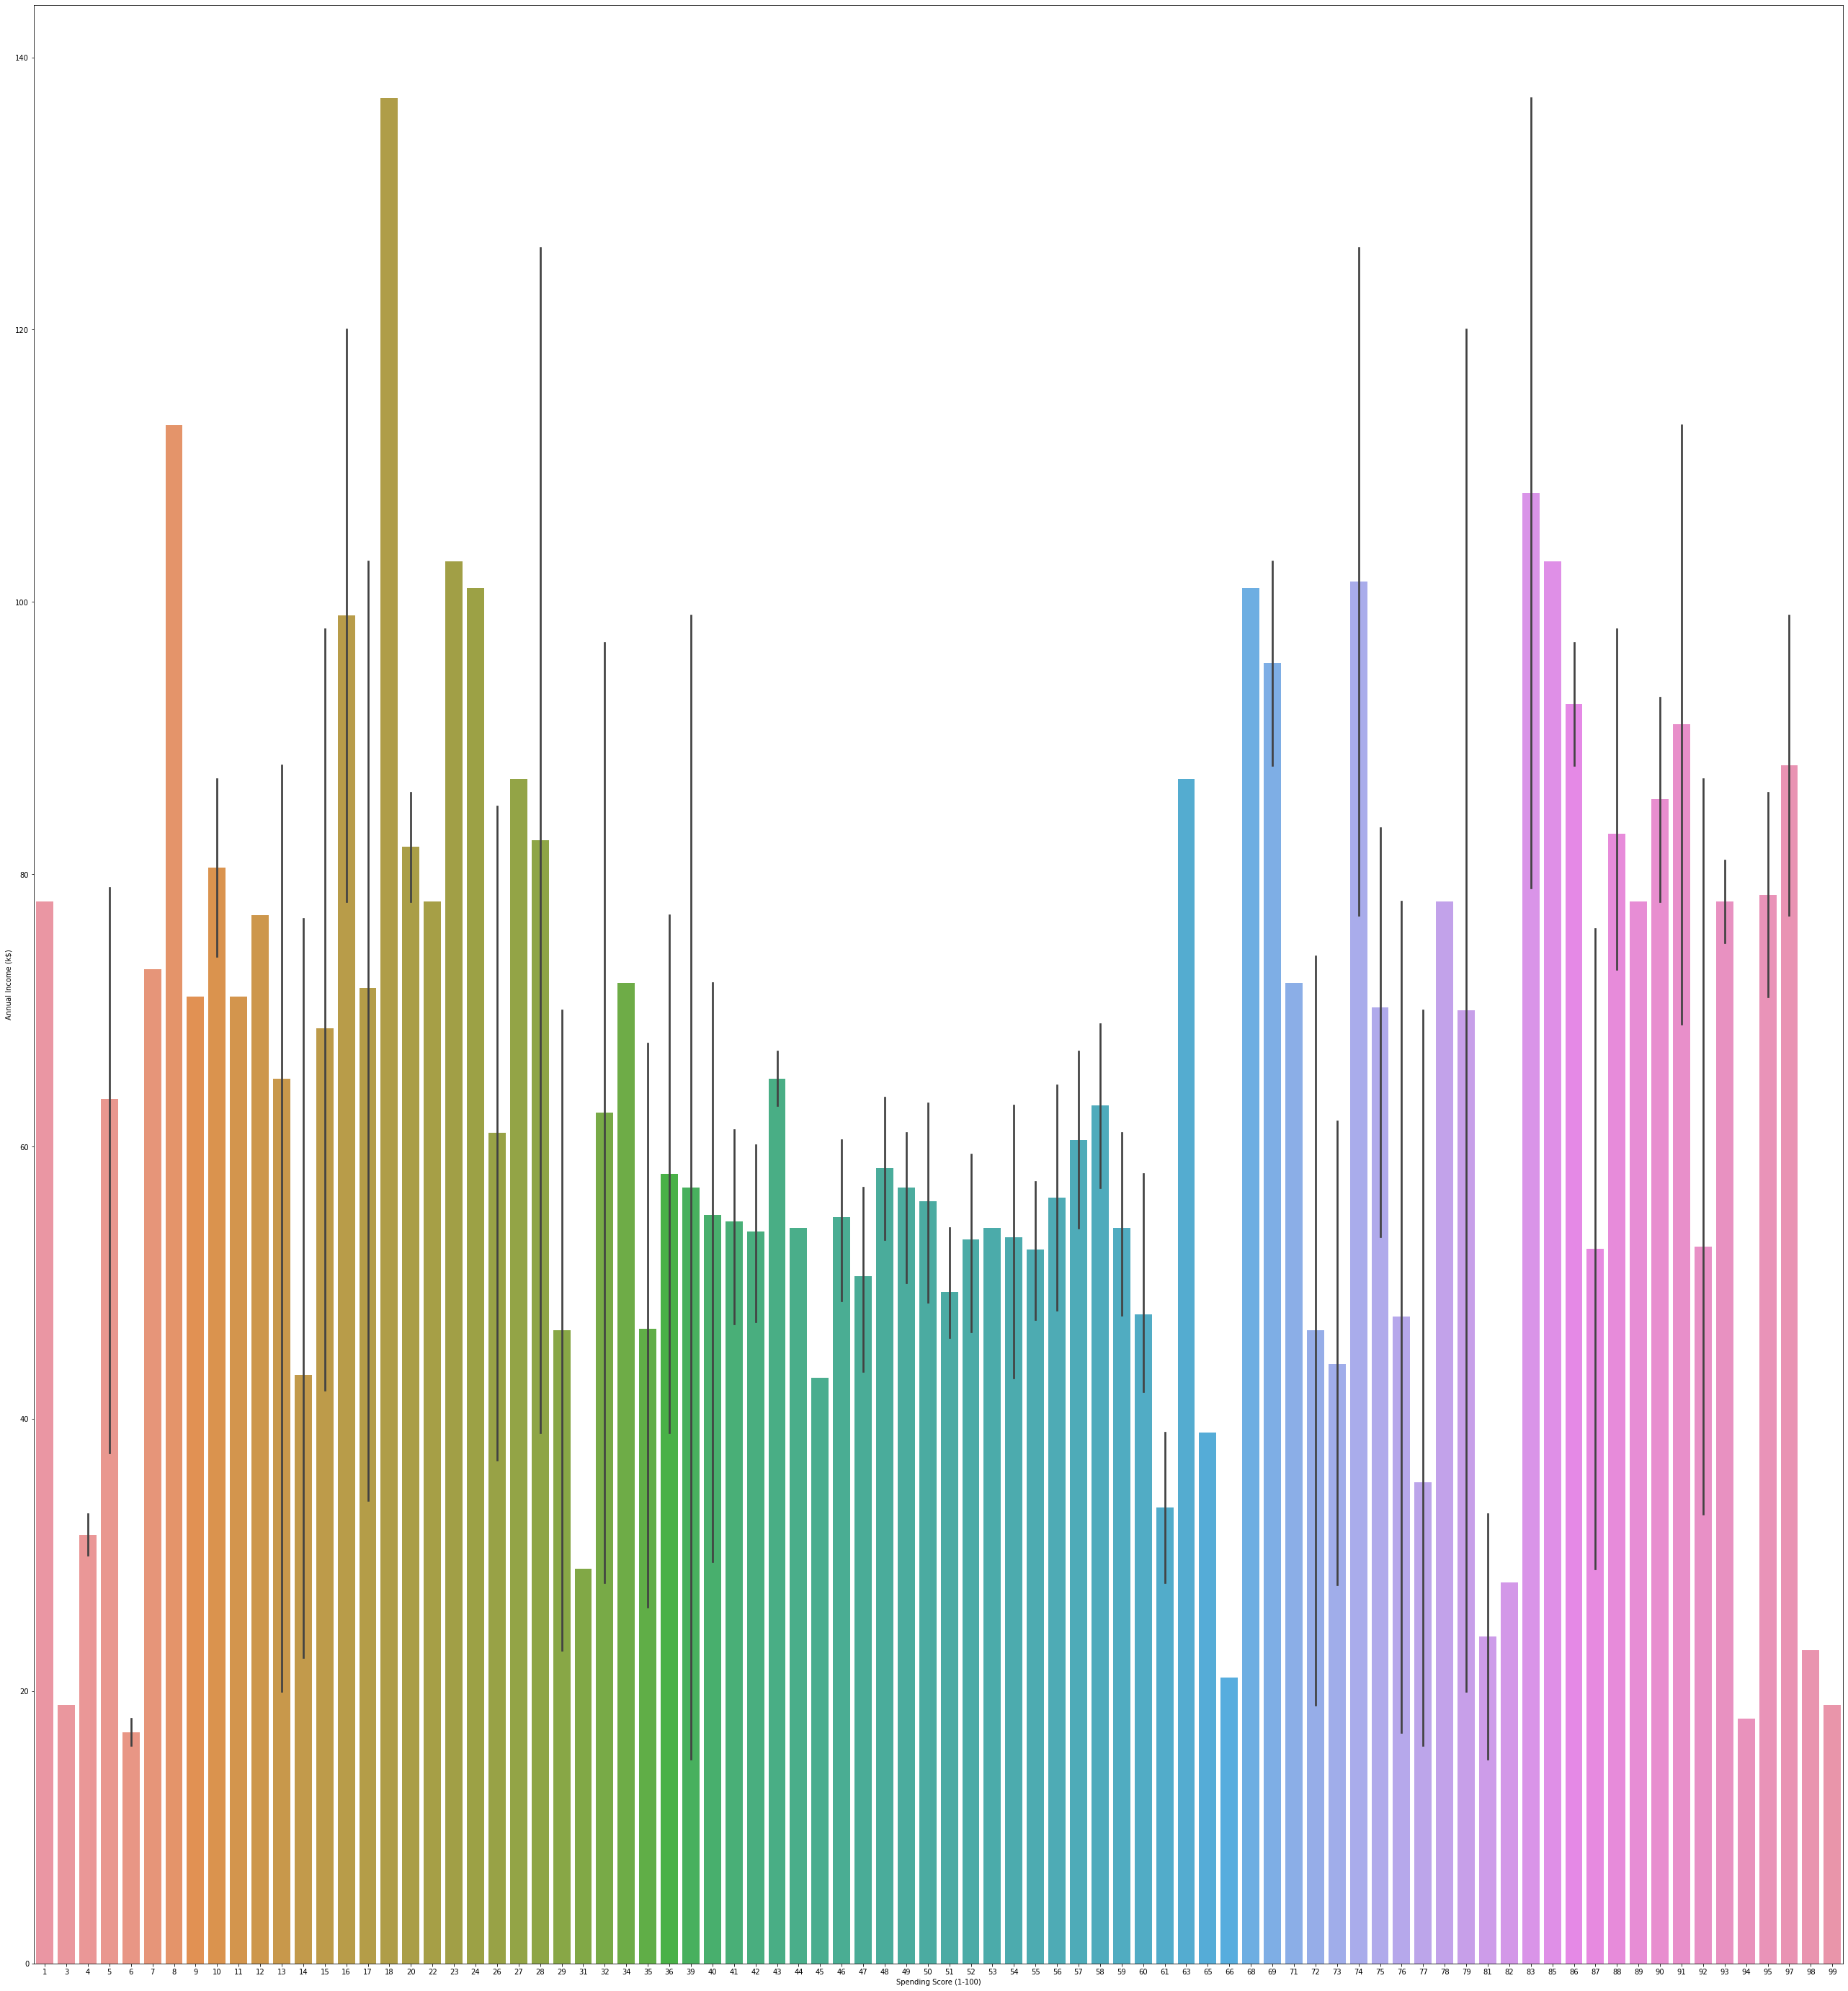

In [16]:
plt.figure(figsize=(45,50))
sns.barplot(data['Spending Score (1-100)'], data['Annual Income (k$)'])

# Multi variate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


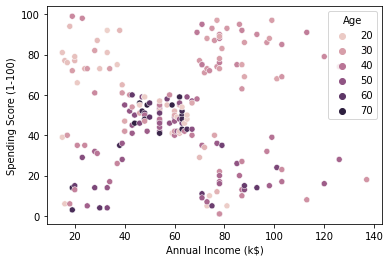

In [17]:
sns.scatterplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], hue = data['Age'])

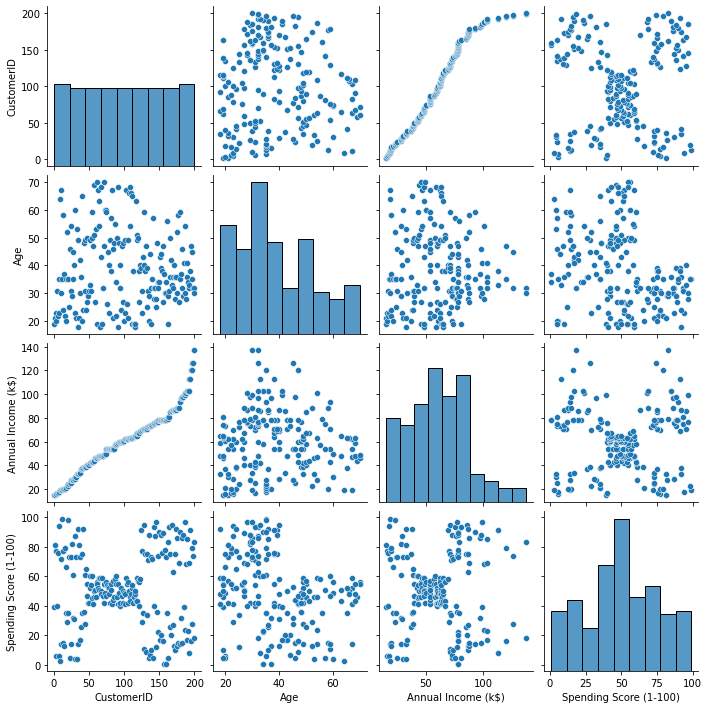

In [ ]:
sns.pairplot(data)

# descriptive Statistics 

In [21]:
data.mean(numeric_only = True)

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [22]:
data.median(numeric_only = True)

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [23]:
data['Age'].mode()

0    32
dtype: int64

In [24]:
data['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])

In [25]:
data.std(numeric_only=True)

CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

In [26]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [27]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [28]:
data.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


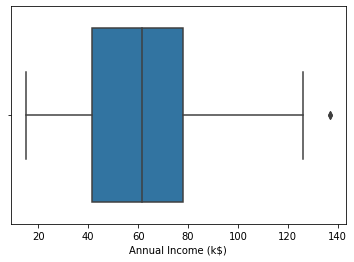

In [29]:
sns.boxplot(data['Annual Income (k$)'])

In [30]:
q = data.quantile([0.75,0.25])

In [31]:
q

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.75,150.25,49.00,78.0,73.00
0.25,50.75,28.75,41.5,34.75


In [32]:
iqr =  q.iloc[0] - q.iloc[1] 

In [33]:
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [34]:
u = q.iloc[0] + (1.5*iqr)   

In [35]:
u

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [36]:
l = q.iloc[1] - (1.5*iqr) 

In [37]:
l

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [38]:
data['Annual Income (k$)'] = np.where(np.logical_or(data['Annual Income (k$)']>132.75,data['Annual Income (k$)']<-13.250), 61.5,data['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


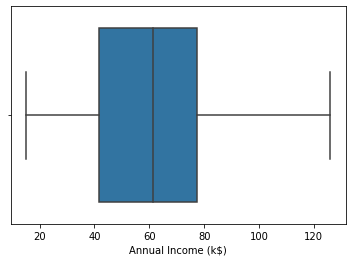

In [39]:
sns.boxplot(data['Annual Income (k$)'])

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender']) 

In [41]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


# scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
x_scaled = min_max.fit_transform(data)

In [43]:
x_scaled

array([[0.        , 1.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00502513, 1.        , 0.05769231, 0.        , 0.81632653],
       [0.01005025, 0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.01507538, 0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.0201005 , 0.        , 0.25      , 0.01801802, 0.39795918],
       [0.02512563, 0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.03015075, 0.        , 0.32692308, 0.02702703, 0.05102041],
       [0.03517588, 0.        , 0.09615385, 0.02702703, 0.94897959],
       [0.04020101, 1.        , 0.88461538, 0.03603604, 0.02040816],
       [0.04522613, 0.        , 0.23076923, 0.03603604, 0.7244898 ],
       [0.05025126, 1.        , 0.94230769, 0.03603604, 0.13265306],
       [0.05527638, 0.        , 0.32692308, 0.03603604, 1.        ],
       [0.06030151, 0.        , 0.76923077, 0.04504505, 0.14285714],
       [0.06532663, 0.        , 0.11538462, 0.04504505, 0.7755102 ],
       [0.07035176, 1.        , 0.

In [44]:
from sklearn.cluster import KMeans
KM=KMeans()
cluster = KM.fit_predict(x_scaled)

In [45]:
cluster

array([4, 4, 3, 3, 3, 3, 0, 3, 6, 3, 6, 3, 0, 3, 4, 4, 3, 4, 6, 3, 4, 4,
       0, 4, 0, 4, 0, 4, 0, 3, 6, 3, 6, 4, 0, 3, 0, 3, 0, 3, 0, 4, 6, 3,
       0, 3, 0, 3, 3, 3, 0, 4, 3, 6, 0, 6, 0, 6, 3, 6, 6, 4, 0, 0, 6, 4,
       0, 0, 4, 3, 6, 0, 0, 0, 6, 4, 0, 6, 3, 0, 6, 4, 6, 0, 3, 6, 0, 3,
       3, 0, 0, 4, 6, 0, 3, 4, 0, 3, 6, 4, 3, 0, 6, 4, 6, 3, 0, 6, 6, 6,
       6, 3, 5, 4, 3, 3, 0, 0, 0, 0, 1, 5, 2, 1, 5, 2, 7, 1, 7, 1, 7, 1,
       5, 2, 7, 2, 5, 1, 7, 2, 5, 1, 5, 2, 7, 1, 7, 2, 5, 1, 7, 1, 5, 2,
       5, 2, 7, 2, 7, 2, 5, 2, 7, 2, 7, 2, 7, 2, 5, 1, 7, 1, 7, 1, 5, 2,
       7, 1, 7, 1, 5, 2, 7, 2, 5, 1, 5, 1, 5, 2, 5, 2, 7, 2, 5, 2, 5, 1,
       7, 1], dtype=int32)

In [46]:
value = data.columns


In [47]:
value

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [48]:
data1 = pd.DataFrame(x_scaled, columns = value)

In [49]:
data1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.009009,0.051020
3,0.015075,0.0,0.096154,0.009009,0.775510
4,0.020101,0.0,0.250000,0.018018,0.397959
...,...,...,...,...,...
195,0.979899,0.0,0.326923,0.945946,0.795918
196,0.984925,0.0,0.519231,1.000000,0.275510
197,0.989950,1.0,0.269231,1.000000,0.744898
198,0.994975,1.0,0.269231,0.418919,0.173469


In [50]:
data1['Cluster_value'] = pd.Series(cluster)

In [51]:
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_value
0,0.000000,1.0,0.019231,0.000000,0.387755,4
1,0.005025,1.0,0.057692,0.000000,0.816327,4
2,0.010050,0.0,0.038462,0.009009,0.051020,3
3,0.015075,0.0,0.096154,0.009009,0.775510,3
4,0.020101,0.0,0.250000,0.018018,0.397959,3


# split the data in X and Y

In [52]:
y = data1['Cluster_value']
data1 = data1.drop(['CustomerID','Cluster_value'], axis = 1)
x = data1
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959
...,...,...,...,...
195,0.0,0.326923,0.945946,0.795918
196,0.0,0.519231,1.000000,0.275510
197,1.0,0.269231,1.000000,0.744898
198,1.0,0.269231,0.418919,0.173469


In [53]:
y

0      4
1      4
2      3
3      3
4      3
      ..
195    2
196    5
197    1
198    7
199    1
Name: Cluster_value, Length: 200, dtype: int32

# Split x and y into Training and Testing

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)

In [55]:
x_train

array([[0.65829146, 1.        , 0.40384615, 0.5045045 , 0.75510204],
       [0.48241206, 0.        , 0.55769231, 0.40540541, 0.46938776],
       [0.90954774, 0.        , 0.26923077, 0.73873874, 0.86734694],
       [0.09547739, 0.        , 0.32692308, 0.07207207, 0.98979592],
       [0.76884422, 0.        , 0.38461538, 0.56756757, 0.76530612],
       [0.46231156, 1.        , 0.57692308, 0.40540541, 0.48979592],
       [0.27135678, 0.        , 0.61538462, 0.25225225, 0.44897959],
       [0.81909548, 0.        , 0.25      , 0.59459459, 0.93877551],
       [0.25628141, 1.        , 0.28846154, 0.24324324, 0.60204082],
       [0.4321608 , 0.        , 0.71153846, 0.37837838, 0.58163265],
       [0.69849246, 0.        , 0.32692308, 0.53153153, 0.7244898 ],
       [0.45226131, 0.        , 0.96153846, 0.3963964 , 0.55102041],
       [0.68844221, 1.        , 0.26923077, 0.52252252, 0.73469388],
       [0.50753769, 0.        , 0.59615385, 0.42342342, 0.47959184],
       [0.72361809, 1.        , 0.

In [56]:
x_train.shape

(140, 5)

In [57]:
x_test

array([[0.09045226, 1.        , 0.65384615, 0.07207207, 0.28571429],
       [0.85427136, 1.        , 0.42307692, 0.64864865, 0.12244898],
       [0.53768844, 1.        , 0.69230769, 0.43243243, 0.45918367],
       [0.49246231, 1.        , 0.57692308, 0.41441441, 0.41836735],
       [0.88944724, 1.        , 0.17307692, 0.65765766, 0.69387755],
       [0.91457286, 1.        , 0.53846154, 0.74774775, 0.14285714],
       [0.02512563, 0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.73366834, 1.        , 0.57692308, 0.55855856, 0.35714286],
       [0.06030151, 0.        , 0.76923077, 0.04504505, 0.14285714],
       [0.7638191 , 0.        , 0.5       , 0.56756757, 0.19387755],
       [0.30653266, 1.        , 0.01923077, 0.27927928, 0.55102041],
       [0.6281407 , 0.        , 0.25      , 0.4954955 , 0.7755102 ],
       [0.90452261, 0.        , 0.36538462, 0.73873874, 0.31632653],
       [0.77386935, 0.        , 0.55769231, 0.56756757, 0.15306122],
       [0.40201005, 1.        , 0.

In [58]:
x_test.shape

(60, 5)

In [59]:
y_train

131    1
96     0
181    2
19     3
153    2
      ..
67     0
192    7
117    0
47     3
172    7
Name: Cluster_value, Length: 140, dtype: int32

In [60]:
y_test

18     6
170    7
107    6
98     6
177    1
182    7
5      3
146    7
12     0
152    5
61     4
125    2
180    5
154    5
80     6
7      3
33     4
130    7
37     3
74     6
183    2
145    1
45     3
159    2
60     6
123    1
179    1
185    1
122    2
44     0
16     3
55     6
150    7
111    3
22     0
189    2
129    1
4      3
83     0
106    0
134    7
66     0
26     0
113    4
168    5
63     0
8      6
75     4
118    0
143    2
71     0
124    5
184    5
97     3
149    1
24     0
30     6
160    5
40     0
56     0
Name: Cluster_value, dtype: int32

# Building the Model

# Multi linear regression model

In [61]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [62]:
pred = mlr.predict(x_test)

In [63]:
pred

array([4.90502474, 6.19470774, 4.5520364 , 4.77049079, 4.27651749,
       6.11356878, 1.25504263, 5.13120199, 3.06758819, 3.54593085,
       4.57335716, 1.51055114, 3.33567602, 3.65520069, 4.24483551,
       0.56876102, 3.08762277, 6.11603344, 1.38554343, 4.36386361,
       1.34365731, 3.11312864, 1.81146084, 1.74867327, 3.80518829,
       3.1163881 , 3.40346597, 3.25412306, 2.09092481, 2.8504646 ,
       2.65036434, 4.6779454 , 5.92925584, 2.49619744, 3.65603808,
       1.39357154, 3.75171591, 2.48524813, 2.4114632 , 1.97182335,
       6.66910587, 2.17807519, 2.67297366, 5.06299225, 3.46523521,
       1.67238554, 5.68281882, 4.57231759, 2.48437011, 1.16887633,
       2.43248003, 3.43722425, 3.02970004, 2.5047849 , 3.30057771,
       3.22282575, 5.78824064, 2.81894561, 2.34818517, 2.03120037])

In [64]:
y_test

18     6
170    7
107    6
98     6
177    1
182    7
5      3
146    7
12     0
152    5
61     4
125    2
180    5
154    5
80     6
7      3
33     4
130    7
37     3
74     6
183    2
145    1
45     3
159    2
60     6
123    1
179    1
185    1
122    2
44     0
16     3
55     6
150    7
111    3
22     0
189    2
129    1
4      3
83     0
106    0
134    7
66     0
26     0
113    4
168    5
63     0
8      6
75     4
118    0
143    2
71     0
124    5
184    5
97     3
149    1
24     0
30     6
160    5
40     0
56     0
Name: Cluster_value, dtype: int32

# Performance metrics

In [69]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [70]:
mse= mean_squared_error(y_test,pred)
mse


3.224292748691767

In [71]:
rmse = np.sqrt(mse)
rmse

1.7956315737622144

In [72]:
r2_score(y_test,pred)


0.46011842347486687